In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_LA_X_df, get_y_df, data_prep
from model_arch import build_LA_model
from hyperparameters import EPOCHS, LEARNING_RATE, BATCH_SIZE
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

2023-09-29 23:57:23.914869: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 23:57:24.027642: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 23:57:24.028579: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 23:57:24.921922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0
Tensorflow version: 2.12.0


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
data_filepath = "../../../data/csv/plant_data.csv"
checkpoint_filepath = "../../../data/csv/"

In [4]:
df = pd.read_csv(data_filepath)
df['LA_mm2'].mean()

705.8715641547861

In [5]:
X = get_LA_X_df(data_filepath)
y = get_y_df(data_filepath, "LA_mm2")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)

In [6]:
model = build_LA_model()
print('Input shape:', X_train[0].shape)

Input shape: (13,)


2023-09-29 23:57:26.846846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-29 23:57:26.928402: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [8]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.2
)

Epoch 1/375


11/11 [==============================] - 2s 17ms/step - loss: 825066.5625 - val_loss: 778396.9375
Epoch 2/375
11/11 [==============================] - 0s 3ms/step - loss: 823532.3750 - val_loss: 777692.9375
Epoch 3/375
11/11 [==============================] - 0s 4ms/step - loss: 821849.9375 - val_loss: 776649.4375
Epoch 4/375
11/11 [==============================] - 0s 3ms/step - loss: 819920.8125 - val_loss: 775160.1875
Epoch 5/375
11/11 [==============================] - 0s 3ms/step - loss: 818201.0000 - val_loss: 773362.0000
Epoch 6/375
11/11 [==============================] - 0s 3ms/step - loss: 816364.7500 - val_loss: 771255.8125
Epoch 7/375
11/11 [==============================] - 0s 4ms/step - loss: 814414.7500 - val_loss: 769106.5000
Epoch 8/375
11/11 [==============================] - 0s 4ms/step - loss: 812595.9375 - val_loss: 766979.6250
Epoch 9/375
11/11 [==============================] - 0s 3ms/step - loss: 811094.7500 - val_loss: 764546.3125
Epoch 10/375
11/11 [==========

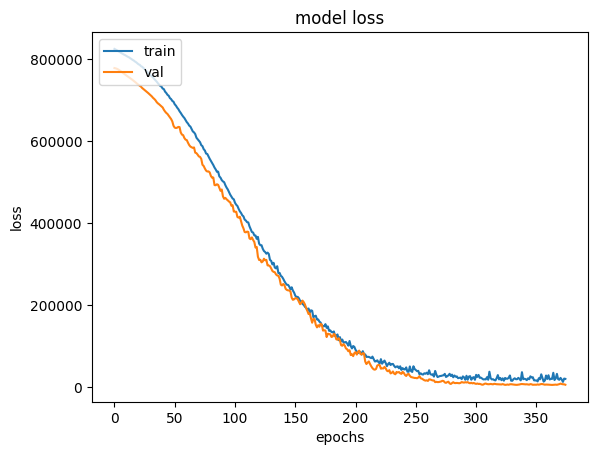

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
print(predictions)

2/2 [==============================] - 0s 2ms/step - loss: 4502.9736


2/2 [==============================] - 0s 2ms/step
[[ 2.6052481e+02]
 [ 2.7191779e+02]
 [ 5.6979465e+01]
 [ 3.1523664e+01]
 [ 1.3009408e+03]
 [ 9.5501135e+02]
 [ 2.5486868e+02]
 [ 1.5719888e+03]
 [ 1.0306238e+03]
 [ 2.0687013e+02]
 [ 8.6746039e+02]
 [ 2.0606409e+02]
 [ 2.1073755e+02]
 [ 3.2960232e+01]
 [ 1.1305830e+03]
 [-1.9665194e-01]
 [ 2.1232948e+02]
 [ 1.7495261e+02]
 [ 1.2731030e+03]
 [ 2.1792343e+02]
 [ 1.3824780e+03]
 [ 2.4371408e+02]
 [ 1.3215759e+03]
 [ 1.9496786e+02]
 [ 2.8537375e+02]
 [ 9.4834406e+02]
 [ 1.2863352e+03]
 [ 1.4875148e+03]
 [ 1.2812493e+03]
 [ 6.9111122e+01]
 [ 2.6910898e+02]
 [ 1.3198965e+03]
 [ 1.9766743e+02]
 [ 1.3190420e+03]
 [ 9.9548004e+02]
 [ 1.4838142e+03]
 [ 9.7409167e+02]
 [ 2.2580832e+02]
 [ 1.0085982e+03]
 [ 2.5023712e+02]
 [ 1.7316013e+03]
 [ 6.0060356e+01]
 [ 1.8562088e+02]
 [ 2.4533769e+02]
 [ 2.2913013e+02]
 [ 1.9951778e+02]
 [ 1.7588882e+02]
 [ 1.0684891e+02]
 [ 2.5367975e+02]
 [ 1.3989941e+03]]
